In [193]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, exp, log, pi, cosh, abs, sqrt, cosh
import mpl_toolkits.mplot3d

from ipywidgets import interact

from scipy.integrate import quad
from scipy.optimize import minimize_scalar

$\renewcommand{\vec}{\mathbf}$

# HW 12 Problem 3

In which you were asked to find a surface joining unit circles at $z = 0$ and $z = 1$ with surface as small as **you** can find. The optimal solution is beyond the scope of this class, but you might find it with a little [googling](http://paulbourke.net/geometry/catenoid/).

The extreme cases given, the cylinder and the 2 disks can both be considered as surfaces of revolution. 

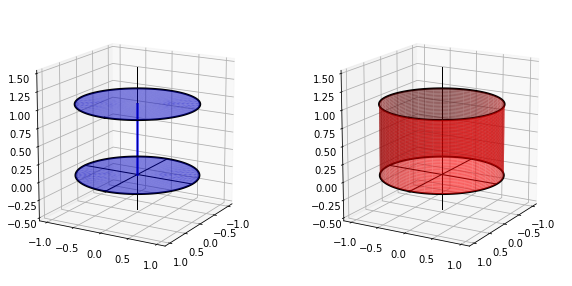

In [125]:
u,v = np.meshgrid(np.linspace(0,1,100),np.linspace(0,2*pi,100))
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122,projection='3d')
ax1.plot_surface(u*cos(v),u*sin(v),1 + 0*u,color='b',alpha=0.6)
ax1.plot_surface(u*cos(v),u*sin(v), 0*u,color='b',alpha=0.6)
ax1.plot([0,0],[0,0],[0,1],color='b',alpha=0.6,lw=3)
ax2.plot_surface(cos(v),sin(v),u,color='r',alpha=0.6);
t = np.linspace(0,2*pi,100)
for ax in [ax1,ax2]: 
    ax.set_zlim(-1/2,3/2)
    ax.view_init(15,30)
    ax.plot([0,0],[-1,1],[0,0],'k',lw = 1,zorder=-1)
    ax.plot([-1,1],[0,0],[0,0],'k',lw = 1,zorder=-1)
    ax.plot([0,0],[0,0],[-1/2,3/2],'k',lw = 1,zorder=-1)

    for z in [0,1]:
        ax.plot(cos(t), sin(t), z,'k',lw=2)


## Surface area for surface of revolution

The parametric form of a surface of revolution $\Sigma$ about the $z$-axis is 
$$\vec r(u,v) = \begin{bmatrix} R(u) \cos v \\ R(u) \sin v \\ u \end{bmatrix}$$
for $a \leq u \leq b, 0 \leq v \leq 2\pi$. $R(u)$ gives the radius of each circle at the level $z=u$. 

The surface area can be computed in terms of $R$. First, we compute $\vec r_u \times r_v$:

$$\vec r_u \times r_v = \begin{vmatrix} \vec i & \vec j & \vec k \\ R'(u)\cos v & R'(u)\sin v & 1 \\ -R(u) \sin v & R(u) \cos v & 0 \end{vmatrix} = \begin{bmatrix} - R(u) \cos v \\ - R(u) \sin v \\ R(u)R'(u) \end{bmatrix} $$ which is oriented inward, but that is no bother as we are computing surface area. 

\begin{equation}\text{SA}(\Sigma) = \iint_\Sigma dS = \int_0^{2\pi}\int_a^b |\vec r_u \times r_v|\,du\,dv = {2\pi}\int_a^b R(u)\sqrt{1 + (R'(u))^2}\,du \end{equation} (We can do the $v$ integral first as the interior is independent of $v$.)

## Back to the task at hand

Thus, to have our boundary circles for this problem, we need only restrict $0 \leq u \leq 1, 0 \leq v \leq 2\pi$ and ensure $R(0) = R(1) = 1$. 

The surfaces above come from the following choices of $R(u)$. The 2-disk (blue) solution is not really a function, but you get the idea.

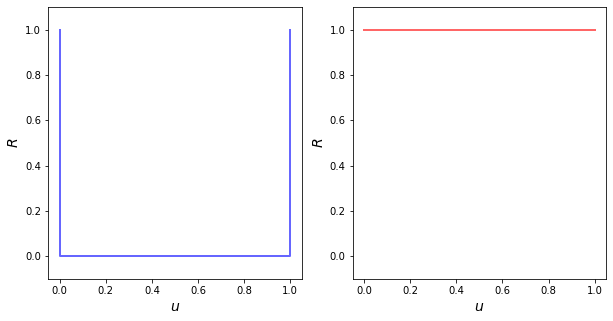

In [99]:
u = np.linspace(0,1,100)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot([0,0,1,1],[1,0,0,1],color='b',alpha=0.6,lw=2)
ax2.plot([0,1],[1,1],color='r',alpha=0.6,lw=2);
ax1.set_ylabel("$R$",fontsize=14)
ax1.set_xlabel("$u$",fontsize=14)
ax2.set_ylabel("$R$",fontsize=14)
ax2.set_xlabel("$u$",fontsize=14)

ax2.set_ylim(-0.10,1.1)
ax1.set_ylim(-0.1,1.1);


We will try different $R(u)$'s.

### Try 1 - absolute value

We "pinch in the waist" of our cylinder by finding an $R(u)$ with smaller values in the middle. Let's try straight lines first.

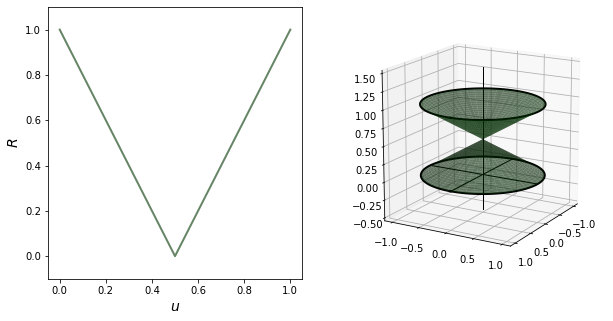

In [126]:
u = np.linspace(0,1,100)
v = np.linspace(0,2*pi,100)
U,V = np.meshgrid(u,v)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')
ax.plot([0,1/2,1],[1,0,1],color='#003400',alpha=0.6,lw=2)
ax.set_ylabel("$R$",fontsize=14)
ax.set_xlabel("$u$",fontsize=14)

ax.set_ylim(-0.1,1.1);
ax2.plot_surface(abs(U-1/2)*2*cos(V),abs(U-1/2)*2*sin(V),U,color='#003400',alpha=0.6);
t = np.linspace(0,2*pi,100)
ax2.set_zlim(-1/2,3/2)
ax2.view_init(15,30)
ax2.plot([0,0],[-1,1],[0,0],'k',lw = 1,zorder=-1)
ax2.plot([-1,1],[0,0],[0,0],'k',lw = 1,zorder=-1)
ax2.plot([0,0],[0,0],[-1/2,3/2],'k',lw = 1,zorder=-1)

for z in [0,1]:
    ax2.plot(cos(t), sin(t), z,'k',lw=2)

The function is $$R(u) = 2|u - 1/2|.$$ Plugging into the SA formula above, we have $$\text{SA} = 2\pi \int_0^1 2|u - 1/2|\sqrt{5}\,du$$ as the derivative always has magnitude 2.

Easy as this is, we're sitting on a python interpreter with `scipy.integrate.quad`:

In [131]:
quad(lambda u: 2*abs(u - 1/2)*sqrt(5), 0, 1)[0]

1.118033988749895

Too big.

**Note**. The answer is of course this times $2\pi$, but as we are comparing it to the cylinder, it is easier to compare this number to 1.

Let's move the notch up and try $$R(u) = |u-1/2lambda u: abs(u-1/2) + 1/2| + 1/2.$$

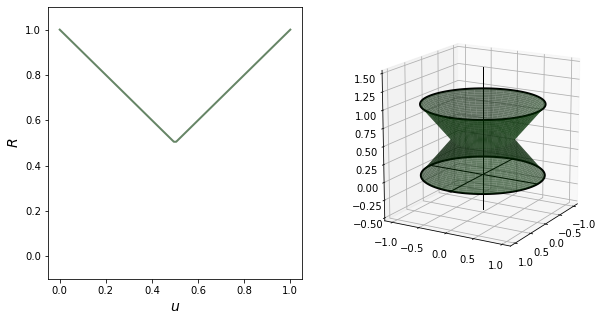

In [161]:
# Let's take all that code from early and make 1 function so we can try out new functions

def plot_R(fn):
    # Check that fn is a good candidate first
    assert np.isclose(fn(1),1)
    assert np.isclose(fn(0),1)

    u = np.linspace(0,1,100)
    v = np.linspace(0,2*pi,100)
    U,V = np.meshgrid(u,v)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    ax2 = fig.add_subplot(122,projection='3d')
    ax.plot(u,fn(u),color='#003400',alpha=0.6,lw=2)
    ax.set_ylabel("$R$",fontsize=14)
    ax.set_xlabel("$u$",fontsize=14)

    ax.set_ylim(-0.1,1.1);
    ax2.plot_surface(fn(U)*cos(V),fn(U)*sin(V),U,color='#003400',alpha=0.6);
    t = np.linspace(0,2*pi,100)
    ax2.set_zlim(-1/2,3/2)
    ax2.view_init(15,30)
    ax2.plot([0,0],[-1,1],[0,0],'k',lw = 1,zorder=-1)
    ax2.plot([-1,1],[0,0],[0,0],'k',lw = 1,zorder=-1)
    ax2.plot([0,0],[0,0],[-1/2,3/2],'k',lw = 1,zorder=-1)

    for z in [0,1]:
        ax2.plot(cos(t), sin(t), z,'k',lw=2)

# Test it here
plot_R(lambda u: abs(u-1/2) + 1/2)

And its surface area over $2\pi$, remembering $|R'(u)| = 1$ (except at the critical point which does not affect the integral).

In [147]:
quad(lambda u: (abs(u-1/2) + 1/2)*sqrt(2),0,1)[0]

1.0606601717798214

Better, but still worse than 1 (the cylinder). Before we abandon these, let's introduce a parameter $h$ for the height of the notch. 

$$R(u) = 2(1-h)|u-1/2| + h$$

The leading coefficient is necessary to have $R(0) = R(1) = 1$. 

In [143]:
@interact(h=(0,1,.025))
def _(h=0.5):
    plot_R(lambda u: 2*(1-h)*abs(u-1/2) + h)

interactive(children=(FloatSlider(value=0.5, description='h', max=1.0, step=0.025), Output()), _dom_classes=('…

Then we can make the surface area a function of $h$.

$$\text{SA}(h)= 2\pi \int_0^1 (2(1-h)|u-1/2| + h)\sqrt{1 + (2(1-h))^2}\,du $$

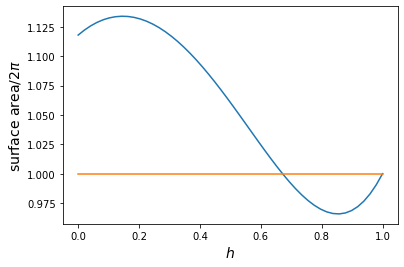

In [158]:
h = np.linspace(0,1,50)
plt.plot(h,[quad(lambda u: (2*(1-hh)*abs(u-1/2) + hh)*sqrt(1 + (2*(1-hh))**2),0,1)[0] for hh in h])
plt.xlabel("$h$",fontsize=14)
plt.ylabel("surface area/$2\pi$",fontsize=14)
plt.plot([1,1]);

A ha. We can beat 1! In fact, we could find the minimum **for this family of functions**. 

In [149]:
minimize_scalar(lambda hh: quad(lambda u: (2*(1-hh)*abs(u-1/2) + hh)*sqrt(1 + (2*(1-hh))**2),0,1)[0], bounds=(0,1))

     fun: 0.9657112946959683
    nfev: 16
     nit: 12
 success: True
       x: 0.8535533905036866

So, at the "$x$" value (our $h$), we got a surface 96.57% the surface area of the cylinder.

### Try 2 - parabolas

We need a parabola that passes through $(0,1)$ and $(1,1)$ (in the "$Ru$"-plane). The first pick might be to start with a function with roots at $0$ and $1$ and translate it up. 
$$R(u) = u(u-1) + 1$$

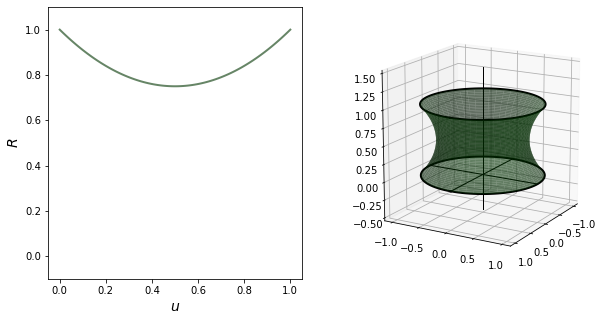

In [150]:
plot_R(lambda u: u*(u-1) + 1)

$$\text{SA} = 2\pi \int_0^1 (u(u-1) + 1)\sqrt{1 + (2u -1)^2}\,du $$

In [152]:
quad(lambda u: (u*(u-1) + 1)*sqrt(1 +(2*u - 1)**2), 0, 1)[0]

0.9658847779003562

1st guess is lower! Let's try the parameter trick.

$$R(u) = 4(1-h)(u-1/2)^2 + h$$

In [153]:
@interact(h=(0,1,.025))
def _(h=0.5):
    plot_R(lambda u: 4*(1-h)*abs(u-1/2)**2 + h)

interactive(children=(FloatSlider(value=0.5, description='h', max=1.0, step=0.025), Output()), _dom_classes=('…

Then we can make the surface area a function of $h$.

$$\text{SA}(h)= 2\pi \int_0^1 (4(1-h)(u-1/2)^2 + h)\sqrt{1 + (8(1-h)(u-1/2)^2}\,du $$

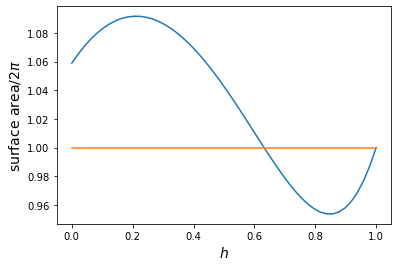

In [157]:
h = np.linspace(0,1,50)
plt.plot(h,[quad(lambda u: (4*(1-hh)*(u-1/2)**2 + hh)*sqrt(1 + (8*(1-hh)*(u-1/2))**2),0,1)[0] for hh in h])
plt.xlabel("$h$",fontsize=14)
plt.ylabel("surface area/$2\pi$",fontsize=14)
plt.plot([1,1]);

In [159]:
minimize_scalar(lambda hh: quad(lambda u: (4*(1-hh)*(u-1/2)**2 + hh)*sqrt(1 + (8*(1-hh)*(u-1/2))**2),0,1)[0], bounds=(0,1))

     fun: 0.9536338661335718
    nfev: 17
     nit: 13
 success: True
       x: 0.8476399514049215

Better. Down to 95.36%.

### Try 3 - sines

$\sin(\pi u)$ has zeros at 0 and 1. Let's try changing the amplitude and subtracting from 1. 

$$R(u) = 1-h \sin(\pi u)$$

In [162]:
@interact(h=(0,1,.025))
def _(h=0.5):
    plot_R(lambda u: 1 - sin(pi*u)*h)

interactive(children=(FloatSlider(value=0.5, description='h', max=1.0, step=0.025), Output()), _dom_classes=('…

Then we can make the surface area a function of $h$.

$$\text{SA}(h)= 2\pi \int_0^1 (1 - h \sin (\pi u))\sqrt{1 + (h\pi \cos (\pi u))^2}\,du $$

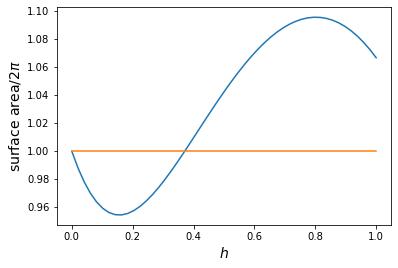

In [165]:
h = np.linspace(0,1,50)
plt.plot(h,[quad(lambda u: (1 - hh*sin(pi*u))*sqrt(1 + (hh*pi*cos(pi*u))**2),0,1)[0] for hh in h])
plt.xlabel("$h$",fontsize=14)
plt.ylabel("surface area/$2\pi$",fontsize=14)
plt.plot([1,1]);

In [166]:
minimize_scalar(lambda hh: quad(lambda u: (1 - hh*sin(pi*u))*sqrt(1 + (hh*pi*cos(pi*u))**2),0,1)[0], bounds=(0,1))

     fun: 0.9544260764319593
    nfev: 17
     nit: 13
 success: True
       x: 0.1558657457189923

Actually, not as good as parabolas.

### Try 4 - hyperbolic trig

Maybe you've heard something about hyperbolic trig functions. 
$$\cosh t = \frac{e^{t} + e^{-t}}{2} \qquad\qquad \sinh t = \frac{e^{t} - e^{-t}}{2} $$

They have remarkable properties like $\cosh^2 t - \sinh^2 t = 1$ as well as being each others derivatives.

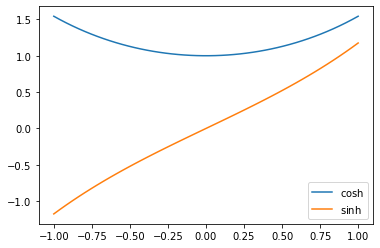

In [181]:
x = np.linspace(-1,1)
plt.plot(x,cosh(x),label="$\cosh $")
plt.plot(x,np.sinh(x),label="$\sinh $");
plt.legend();

Transform cosh to fit our situation. $$R(u) = \frac{\cosh(2u - 1)}{\cosh(1)}$$

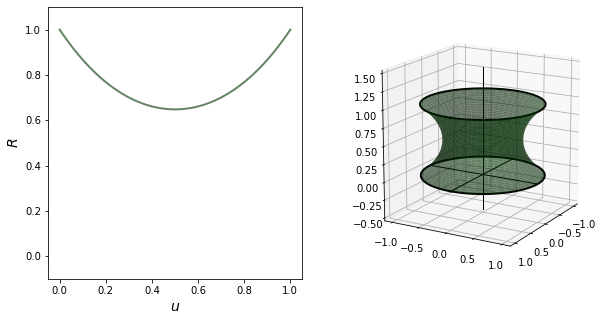

In [180]:
plot_R(lambda u: cosh((u - 1/2)*2)/cosh(1))



$$\text{SA} = 2\pi \int_0^1 \frac{\cosh(2u - 1)}{\cosh(1)}\sqrt{1 + \left(\frac{2\sinh(2u - 1)}{\cosh(1)}\right)^2}\,du $$

In [189]:
quad(lambda u: cosh(2*u - 1)/cosh(1)*sqrt(1 +(2*np.sinh(2*u - 1)/cosh(1))**2), 0 , 1)[0]

0.9957453541985554

Not too good. Let's try a parameter. We can "squeeze" the function before scaling it down to hit our boundary.

$$R(u) = \frac{\cosh(h(2u - 1))}{\cosh(h)}$$

In [185]:
@interact(h=(0,10,.1))
def _(h=0.5):
    plot_R(lambda u: cosh(h*(2*u - 1))/cosh(h))

interactive(children=(FloatSlider(value=0.5, description='h', max=10.0), Output()), _dom_classes=('widget-inte…



$$\text{SA}(h) = 2\pi \int_0^1 \frac{\cosh(h(2u - 1))}{\cosh(h)}\sqrt{1 + \left(\frac{2h\sinh(h(2u - 1))}{\cosh(h)}\right)^2}\,du $$

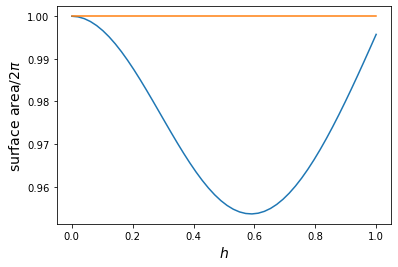

In [188]:
h = np.linspace(0,1,50)
plt.plot(h,[quad(lambda u: \
                 (cosh(hh*(2*u - 1))/cosh(hh))\
                 *sqrt(1 + (hh*2*np.sinh(hh*(2*u - 1))/cosh(hh))**2)\
                 ,0,1)[0] for hh in h])
plt.xlabel("$h$",fontsize=14)
plt.ylabel("surface area/$2\pi$",fontsize=14)
plt.plot([1,1]);

In [192]:
minimize_scalar(lambda hh: quad(lambda u: \
                                (cosh(hh*(2*u - 1))/cosh(hh))\
                                *sqrt(1 + (hh*2*np.sinh(hh*(2*u - 1))/cosh(hh))**2)\
                                ,0,1)[0], bounds=(0,1))

     fun: 0.9536241067020027
    nfev: 14
     nit: 10
 success: True
       x: 0.5893877721855365

A hair under the quadratic functions. As good as I can do...